<a href="https://colab.research.google.com/github/DanielPopoola/data-science-projects/blob/main/US_House_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
os.chdir('/content/drive/MyDrive/Projects/data-science-projects')

## Supply file dictionary:



> Date: Date

> Permit: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)

> MSASCSR: Monthly Supply of New Houses in the United States (Seasonally Adjusted)

> TLRESCONS: Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)

> EVACANTUSQ176N: Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)

> CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)


















## Demand file dictionary: 

*   DATE: Date

*   INTDSRUSM193N: Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)

*   UMCSENT: University of Michigan: Consumer Sentiment

*   GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate)
*   MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)

*   CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)


*   MSPUS: Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)



## Import necessary modules and review the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

supply = pd.read_csv('datasets/supply.csv', parse_dates = ['DATE'])
demand = pd.read_csv('datasets/demand.csv', parse_dates = ['DATE'])

In [17]:
supply.sample(5)

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
54,2016-01-07,181.8356667,4.9,1234,486843,17160
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654
20,2008-01-01,171.5756667,9.833333333,1025,400027.3333,18642
71,2020-01-10,233.09,3.866666667,1698.333333,707944.3333,15446
52,2016-01-01,177.7003333,5.533333333,1153.666667,469067,17758


In [4]:
demand.sample(5)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
72,2021-01-01,242.267000,2.875833,80.233333,0.25,369800,22313.850
42,2013-01-07,156.931333,4.440000,81.566667,0.75,264800,16911.068
46,2014-01-07,165.232667,4.135385,82.966667,0.75,281000,17743.227
6,2004-01-07,152.716667,5.894286,95.600000,2.50,213500,12305.307
50,2015-01-07,172.964333,3.954615,90.733333,0.75,295800,18306.960


In [5]:
supply.isnull().sum()


DATE              0
CSUSHPISA         0
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
dtype: int64

In [6]:
demand.isnull().sum()

DATE             0
CSUSHPISA        1
MORTGAGE30US     0
UMCSENT          0
INTDSRUSM193N    7
MSPUS            0
GDP              0
dtype: int64

In [7]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            82 non-null     datetime64[ns]
 1   CSUSHPISA       82 non-null     object        
 2   MSACSR          82 non-null     object        
 3   PERMIT          82 non-null     object        
 4   TLRESCONS       82 non-null     object        
 5   EVACANTUSQ176N  82 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.0+ KB


In [24]:
# Define the columns and their new data types
cols = {'CSUSHPISA': float, 'MSACSR': float, 'PERMIT': float, 'TLRESCONS': float, 'EVACANTUSQ176N': float}

# Clean the non-convertible values
supply = supply.replace('.', 0)

# Change the data types of the specified columns
supply = supply.astype(cols)

# Output the updated DataFrame
supply.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            82 non-null     datetime64[ns]
 1   CSUSHPISA       82 non-null     float64       
 2   MSACSR          82 non-null     float64       
 3   PERMIT          82 non-null     float64       
 4   TLRESCONS       82 non-null     float64       
 5   EVACANTUSQ176N  82 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.0 KB


In [25]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           81 non-null     datetime64[ns]
 1   CSUSHPISA      80 non-null     float64       
 2   MORTGAGE30US   81 non-null     float64       
 3   UMCSENT        81 non-null     float64       
 4   INTDSRUSM193N  74 non-null     float64       
 5   MSPUS          81 non-null     int64         
 6   GDP            81 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 4.6 KB


In [26]:
demand['INTDSRUSM193N'].fillna(demand['INTDSRUSM193N'].mean(), inplace=True)
demand['CSUSHPISA'].fillna(demand['CSUSHPISA'].mean(), inplace=True)

In [27]:
supply_demand = supply.merge(demand, on='DATE',how='inner')

In [28]:
supply_demand = supply_demand.drop('CSUSHPISA_y',axis=1)

In [29]:
supply_demand.sample(5)

,DATE,CSUSHPISA_x,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
56,2017-01-01,187.371667,5.233333,1268.666667,529871.3333,17384.0,4.173077,97.233333,1.333333,313100,19148.194
39,2012-01-10,144.562667,4.666667,915.000000,302709.3333,17939.0,3.359231,79.400000,0.750000,251700,16420.386
11,2005-01-10,179.539333,4.800000,2169.333333,670433.0000,15823.0,6.226154,82.433333,5.000000,243600,13324.204
33,2011-01-04,139.924333,6.633333,611.666667,254937.3333,18843.0,4.650769,71.866667,0.750000,228100,15557.535
58,2017-01-07,192.637333,5.733333,1289.000000,549521.6667,17684.0,3.883846,95.100000,1.750000,320500,19561.896


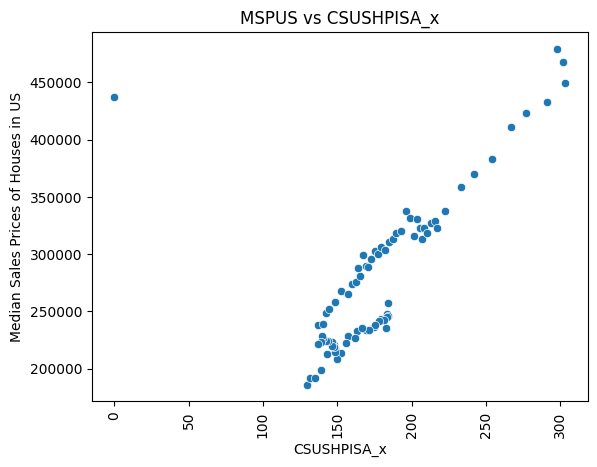

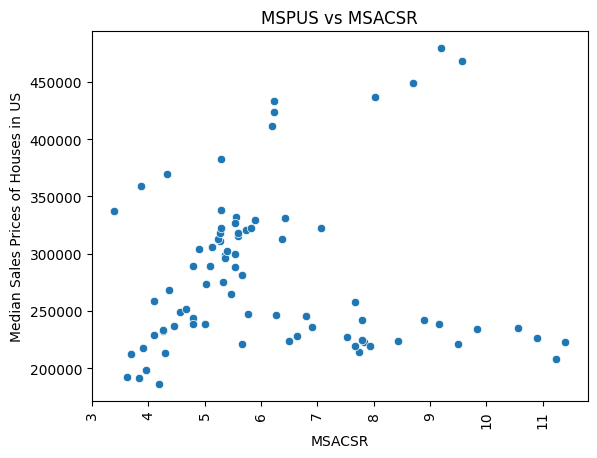

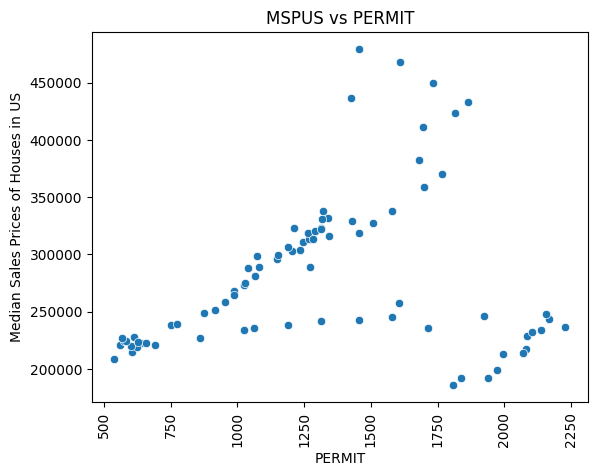

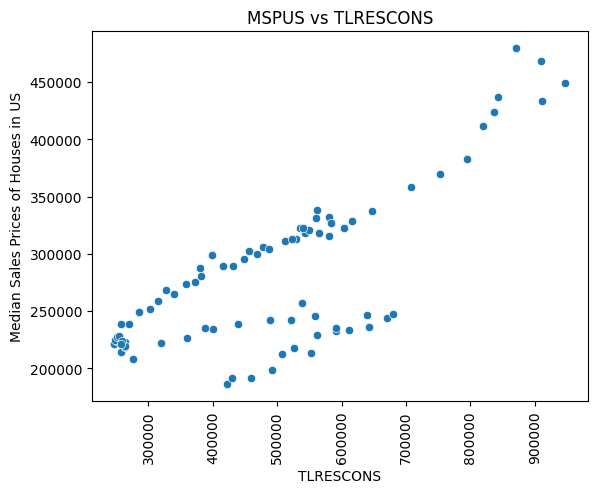

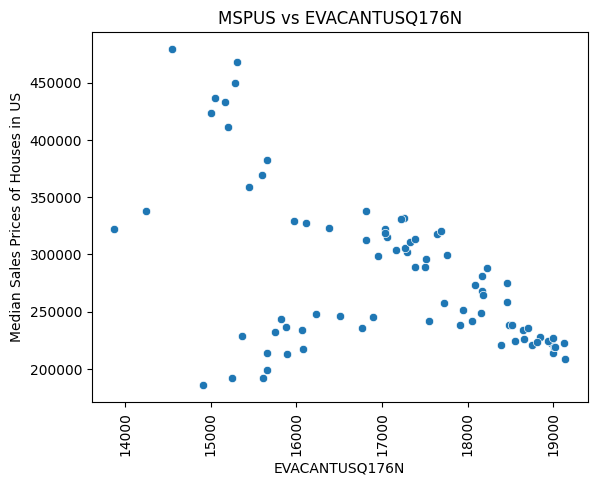

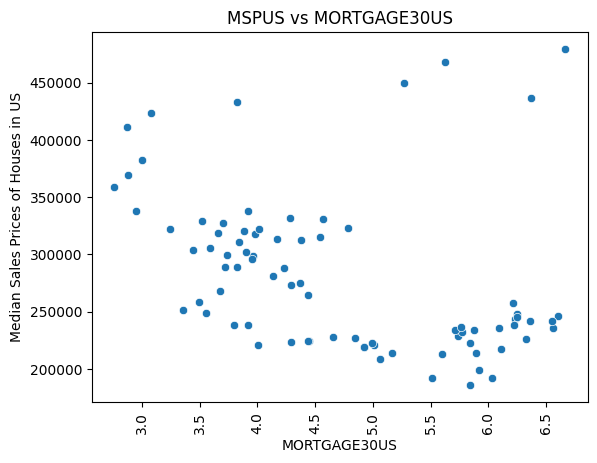

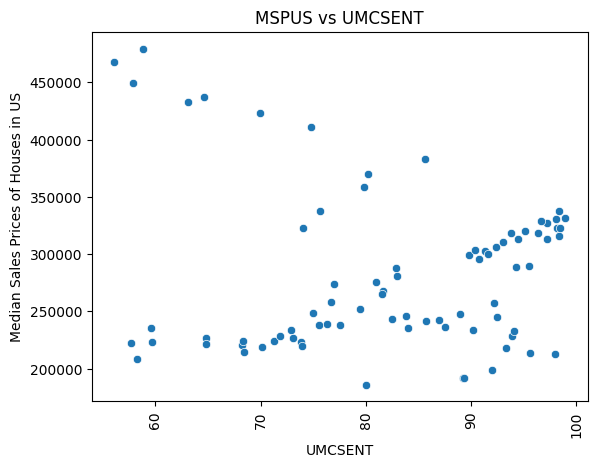

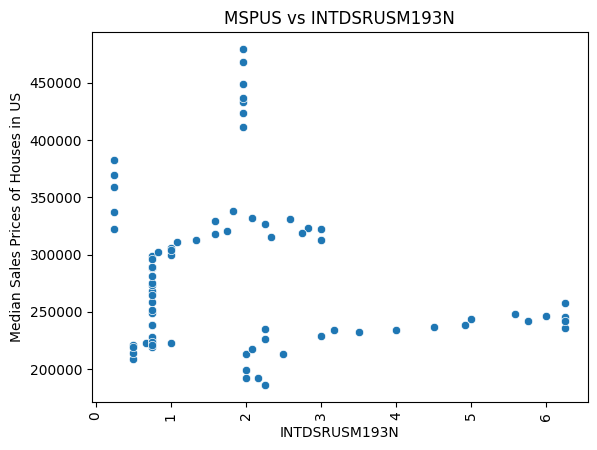

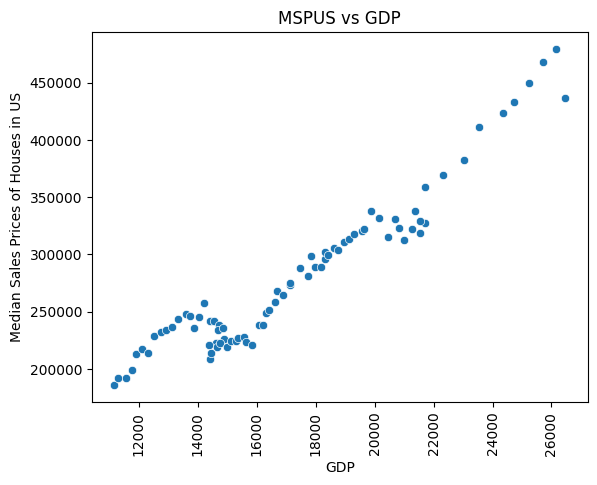

In [30]:
label = 'MSPUS'
features = ['CSUSHPISA_x','MSACSR','PERMIT','TLRESCONS','EVACANTUSQ176N','MORTGAGE30US','UMCSENT','INTDSRUSM193N','GDP']

for col in features:
  sns.scatterplot(data=supply_demand, x=col ,y=label)
  plt.xlabel(col)
  plt.ylabel('Median Sales Prices of Houses in US')
  plt.xticks(rotation=90)
  plt.title(f'MSPUS vs {col}')
  plt.show()

<Axes: >

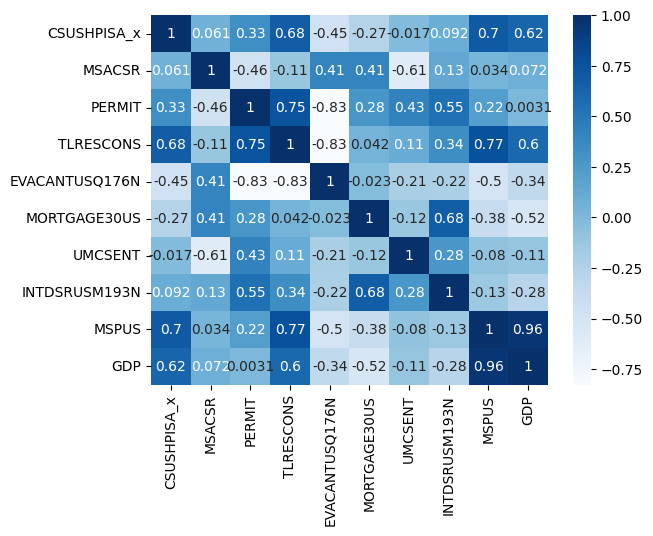

In [31]:
sns.heatmap(supply_demand.corr(numeric_only=True),annot=True, cmap='Blues')

## Split the data

In [32]:
from sklearn.model_selection import train_test_split

X, y = supply_demand[features].values, supply_demand[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

print(f"Training set:{X_train.shape}\nTest set:{X_test.shape}")

Training set:(60, 9)
Test set:(21, 9)


## Preprocess and train data

In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

num_features = [0,1,2,3,4,5,6,7,8]
num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer, num_features)
])

models = {
      'Linear Regression': LinearRegression(),
      'Random Forest Regressor': RandomForestRegressor(),
      'XGBoost Regressor': XGBRegressor() 
}

model_results = []
model_names = []

for name, model in models.items():
  pipeline = Pipeline(steps=[
      ('preprocessor',preprocessor),
      ('model',model)
  ])

   # Perform hyperparameter tuning
  if name == "Random Forest Regression":
    param_grid = {
      'model__n_estimators': [50, 100, 200],
      'model__max_depth': [5, 10, 15]
    }
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
  else:
      pipeline.fit(X_train, y_train)
      best_model = pipeline

  predictions = best_model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  r2 = r2_score(y_test, predictions)
  print({f'{name}':[f'RMSE:{rmse}',f'R2:{r2}']})

{'Linear Regression': ['RMSE:11036.893647132374', 'R2:0.9656405645808954']}
{'Random Forest Regressor': ['RMSE:7881.2239138951245', 'R2:0.9824797767172854']}
{'XGBoost Regressor': ['RMSE:15061.791483521485', 'R2:0.9360109642917943']}
